# Predicting heart disease using machine learning

Using a plenty of Python-based machine learning and data science libraries in a join to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical features.

We're going to take the following list:
1. Problem defination
2. Data
3. Evalation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Defination

In a statement
> Given detail about patient, can we predict whether or not thay have heart disease?

## 2. Data

https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll sure about the project.

## 4. Features

**data dictionary**
<img src="inbox_3632459_a01747fb0158dc51c12bc0824c9c4ae4_data_dictionary2.png">

1. Age
2. Sex : 
* male : 1
* female : 0
3. chest pain type
* 1: typical angina
* 2: atypical angina
* 3: non-anginal pain
* 4: asymptomatic
4. trestbps-resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern.
5. chol-serum cholestoral in mg/dl

6. fbs
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg-resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping

12. vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

13. A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. Target : 0 No Heart disease
	     1 Heart disease

## Preparing the tools
We're giong to use pandas, NumPy and MatPlotlib for data analysis and manipulation.


In [1]:
# Import all the tools we need

# tools for data analysis and ploting libaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data exploration ()
The target here is finding morw about the data and become a subject matter export on the dataset

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. what is missing from the data and how do you solve it?
4. Where are the outliners and why should you care about them?
5. How can you add, change or reduce feature to get more out of your data?


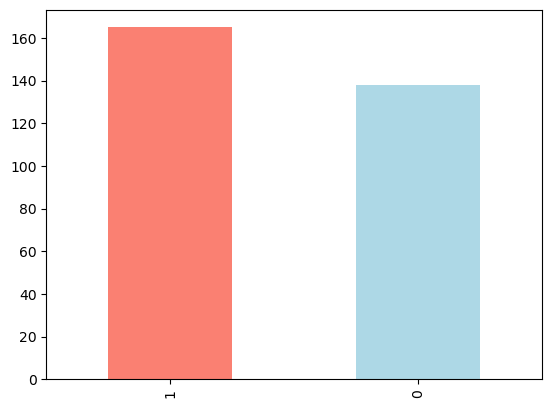

In [3]:
df["target"].value_counts().plot(kind="bar",color = ["salmon","lightblue"]);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.isna().sum() # ==> there no missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
### heart disease's frequency according to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

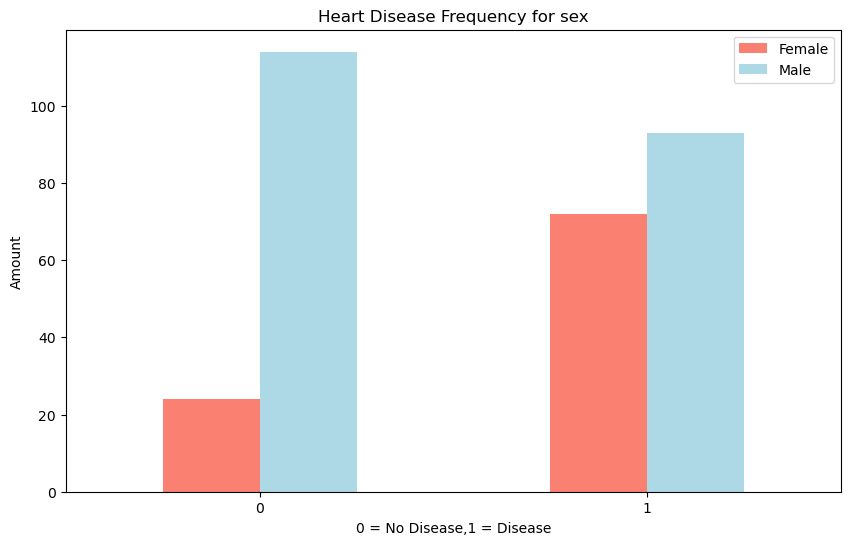

In [9]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   color=["salmon","lightblue"],
                                   figsize=(10,6));
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

### Age vs .Max Heart Rate for heart disease

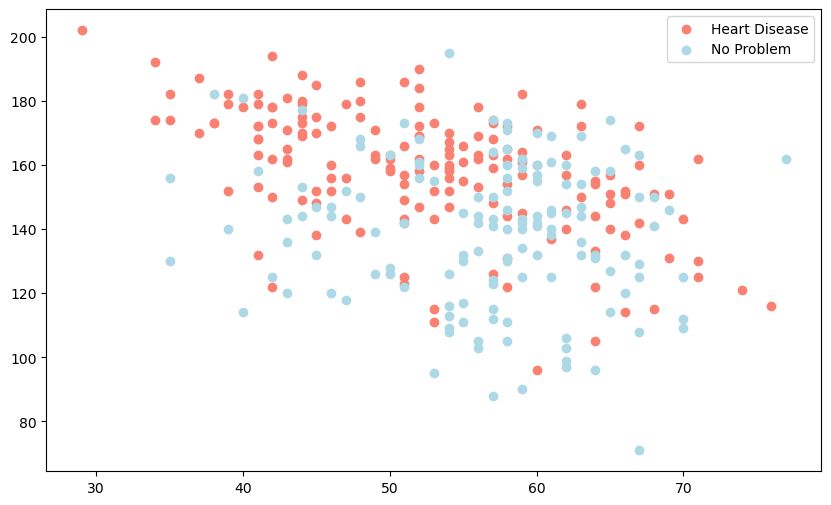

In [13]:
# Create another figure
plt.figure(figsize=(10,6))
# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c = "salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue")

# Add some helpful info
plt.legend(["Heart Disease","No Problem"])
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Ma ")

### Make heart disease frequency according to chest pain type
3. chest pain type
* 1: typical angina (đau ngực có liên quan đến tim)
* 2: atypical angina (đau ngực không liên quan đến tim)
* 3: non-anginal pain (đau thắt ngực)
* 4: asymptomatic (không triệu chứng)

In [29]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


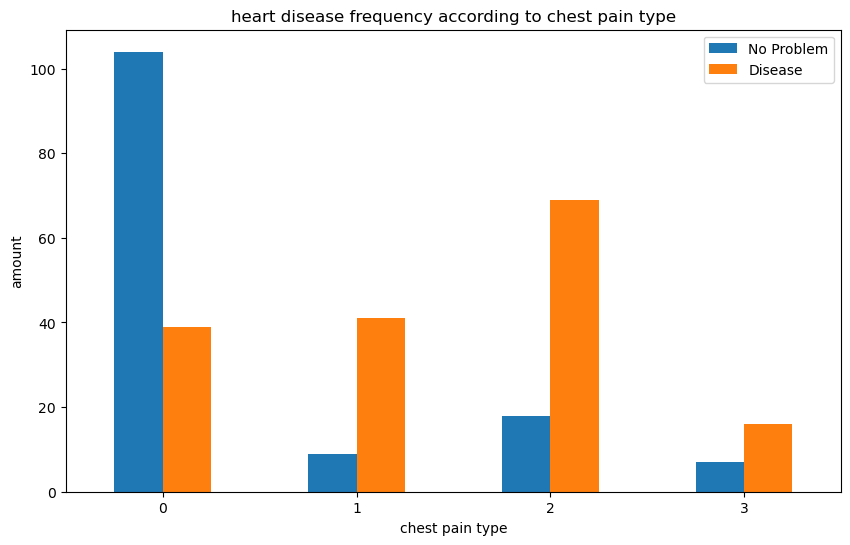

In [32]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6))
plt.title("heart disease frequency according to chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["No Problem","Disease"])
plt.xticks(rotation=0);

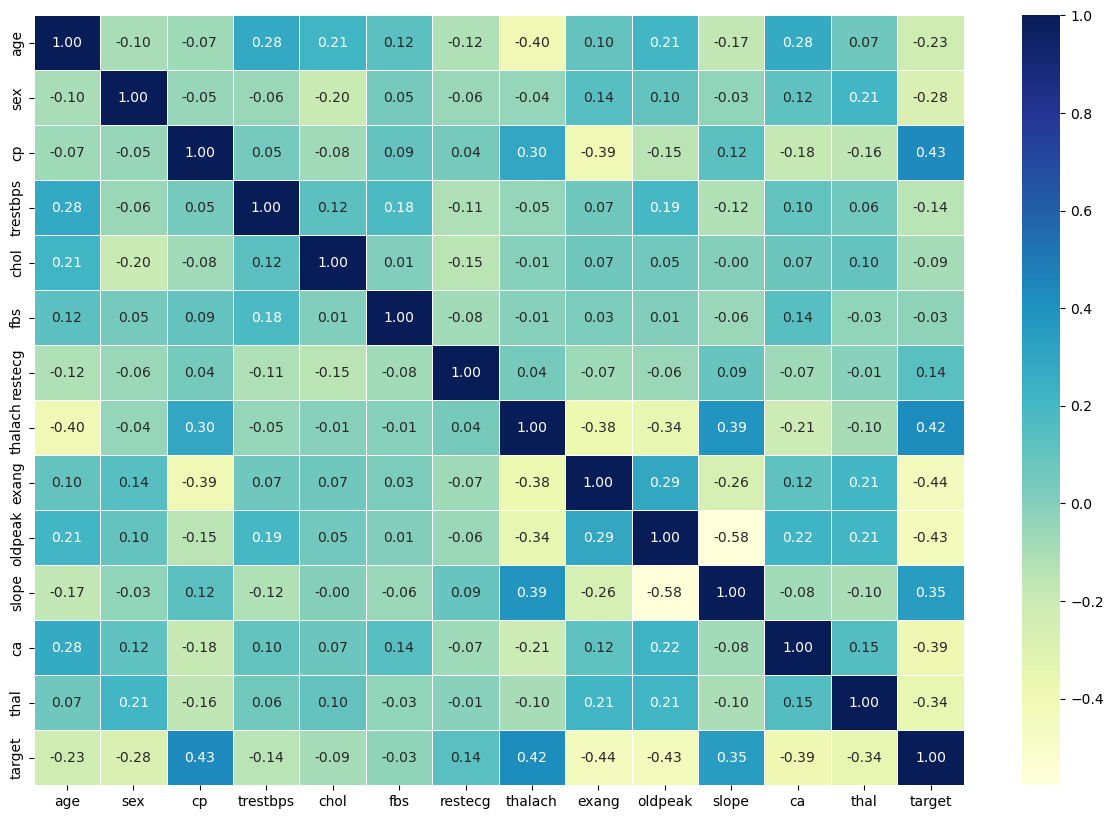

In [5]:
corr_matrixs = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrixs,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


## 5. Modelling

In [6]:
X = df.drop("target",axis=1)
y = df.target

In [7]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbor
3. Random Forest Classification

In [8]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [11]:
model_scores = fit_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

C:\Users\DELL\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [13]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


(array([0]), [Text(0, 0, 'accuracy')])

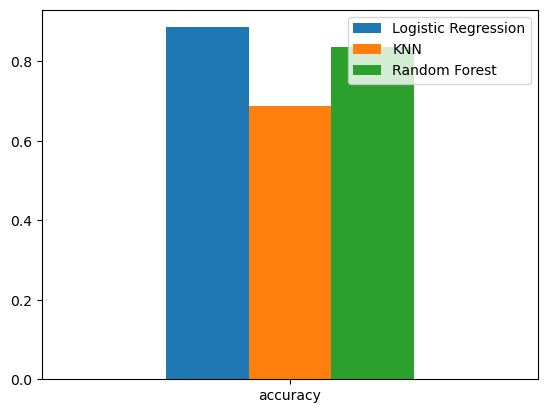

In [16]:
model_compare.plot(kind="bar");
plt.xticks(rotation=0)

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* classification report
* ROC curve
* Area under the curve (AUC)


In [23]:
# let's tuning hyperparameter KNN
train_scores = []
test_score = []

k_range = range(1,21)
knn = KNeighborsClassifier(n_neighbors=i)
for i in k_range:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
train_scores,test_score

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Max score in test: 75.41%


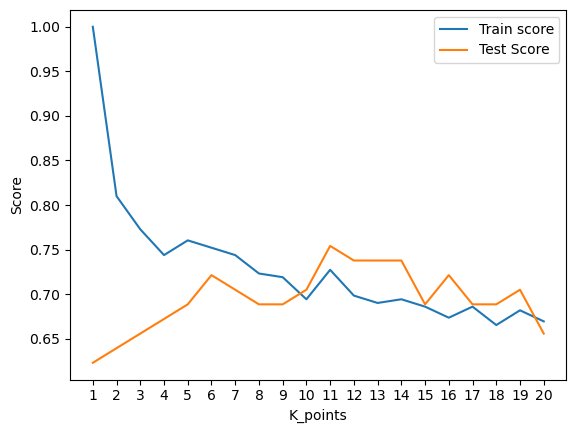

In [35]:
plt.plot(k_range,train_scores,label="Train score")
plt.plot(k_range,test_score,label="Test Score")
plt.xlabel("K_points")
plt.ylabel("Score")
plt.xticks(range(1,21,1))
plt.legend();
print(f"Max score in test: {max(test_score)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV
We're going to tune
* LogisticRegression()
* RandomForestClassifier()
using RandomizedSearchCV()

In [36]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [48]:
# Create a hyperparameter gird for logisticRegression
reg_grid = {"C":np.logspace(-4,4,20),
            "solver":["liblinear"]}
# Create a hyperparameter grid for ramdomforestclassifier
rf_gird = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [42]:
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=reg_grid,
                                cv = 5,
                                n_iter=20, # Number of try
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [44]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [50]:
np.random.seed(42)
# Setup random hyperparameter search for ramdomforestclassifier
rf_log_reg = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions = rf_gird,
                                cv = 5,
                                n_iter=20, # Number of try
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rf_log_reg.fit(X_train,y_train);

                              

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [51]:
rf_log_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [52]:
rf_log_reg.score(X_test,y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV
Because LogisticRegression model provides the best score so that we
improve them again by using GridSearchCV

In [57]:
reg_grid = {"C":np.logspace(-4,4,40),
            "solver":["liblinear"]}
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=reg_grid,
                                cv = 5,
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [58]:
rs_log_reg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [59]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier
* ROC curve and AUC score
(ROC curve is created by plotting the true positive rate against the false positive rate at various threshlod settings)
* Confution matrix
* Classification report
* Precision
* Recall
* F1-score

In [60]:
y_preds = rs_log_reg.predict(X_test)

In [61]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
y_probs = rs_log_reg.predict_proba(X_test)
y_probs_positive = y_probs[:,1]

In [66]:
def plot_rox_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = "orange",label="ROC")
    #plt.plot([0,1],[0,1],color = "darkblue",label="Guessing",linestyle="--")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
from sklearn.metrics import roc_curve

In [70]:
fpr,tpr,t = roc_curve(y_test,y_probs_positive)

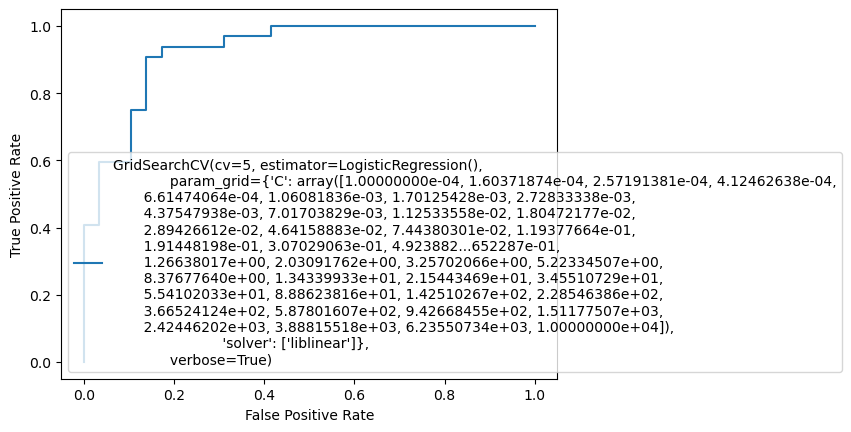

In [79]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=rs_log_reg)
roc_display.plot()
plt.legend()

In [80]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [82]:
a = pd.DataFrame(confusion_matrix(y_test,y_preds))
a

,0,1
0,25,4
1,3,29


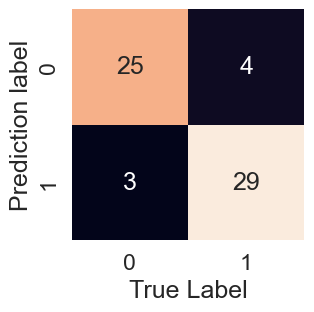

In [85]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Prediction label")
plot_confusion_matrix(y_test,y_preds)

In [86]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Precision = True Positive / (True Positive + False Positive)**

**Recall = True Positive / (True Positive + False Negative)**

**F1_score = 2 * (precision * recall) / (precision + recall)**

In [87]:
## Calculate avaluation metrics using cross-validation
rs_log_reg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [91]:
the_best = LogisticRegression(C=0.19144819761699575,
                              solver="liblinear")
the_best_acc = cross_val_score(the_best,
                               X,
                               y,
                               cv=5,
                               scoring="accuracy")
the_best_acc = np.mean(the_best_acc)
the_best_acc

0.8446994535519124

In [93]:
the_best_pre = cross_val_score(the_best,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
the_best_pre = np.mean(the_best_pre)
the_best_pre

0.8207936507936507

In [95]:
the_best_recall = cross_val_score(the_best,
                               X,
                               y,
                               cv=5,
                               scoring="recall")
the_best_recall = np.mean(the_best_recall)
the_best_recall

0.9212121212121213

In [96]:
the_best_f1 = cross_val_score(the_best,
                               X,
                               y,
                               cv=5,
                               scoring="f1")
the_best_f1 = np.mean(the_best_f1)
the_best_f1

0.8673007976269721

In [99]:
data = pd.DataFrame({"Accuracy":the_best_acc,
                     "Precision":the_best_pre,
                     "Recall":the_best_recall,
                     "F1_score":the_best_f1},
                    index=[0])

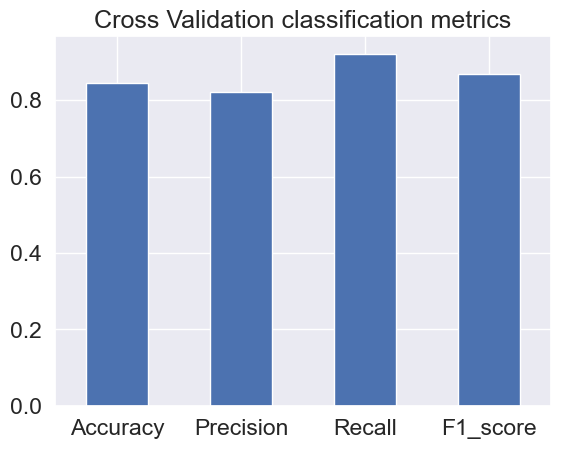

In [106]:
data.T.plot.bar(legend=False);
plt.title("Cross Validation classification metrics")
plt.xticks(rotation=0);

### Feature importance is which features contributed most to the target and how did they contribute?
Finding feature importance is different for each learning machine model

In [108]:
# Fit an instance of losgicregression
the_best.fit(X_train,y_train);

In [109]:
the_best.coef_

array([[ 0.0029144 , -0.837791  ,  0.65378004, -0.01156182, -0.00164117,
         0.04203349,  0.30348585,  0.02453154, -0.59009495, -0.56549405,
         0.44062384, -0.62932396, -0.66848124]])

In [110]:
feature_dict = dict(zip(df.columns,list(the_best.coef_[0])))
feature_dict

{'age': 0.002914398795111991,
 'sex': -0.8377910046136857,
 'cp': 0.6537800355043895,
 'trestbps': -0.011561822661590402,
 'chol': -0.0016411669456354325,
 'fbs': 0.042033489707944585,
 'restecg': 0.30348585121392224,
 'thalach': 0.024531541323197813,
 'exang': -0.5900949486054733,
 'oldpeak': -0.5654940506532073,
 'slope': 0.44062384093154205,
 'ca': -0.6293239551627766,
 'thal': -0.668481235028514}

<Axes: title={'center': 'Feature Importance'}>

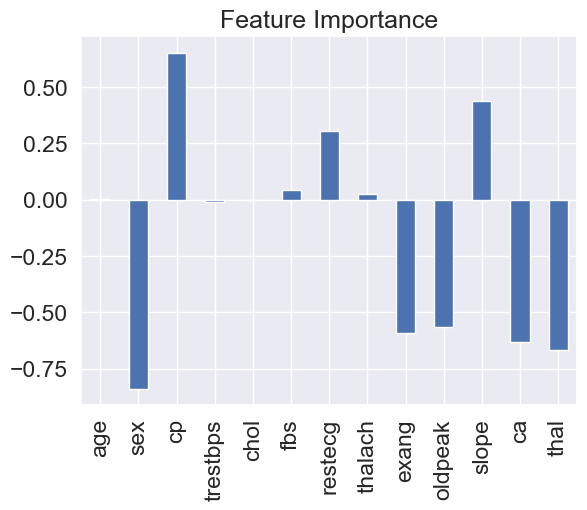

In [112]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [113]:
import pickle
pickle.dump(the_best,open("LogisticRegression_HeartDisease.pkl","wb"))